# Idiosyncratic Labor Supply and Unemployment
# An exploration of Aiyagari (1994)

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Dostenlinus/Aiyagari-HARK/HEAD)

This notebook replicates a seminal work of Aiyagari (1994), which introduced uninsured idiosyncratic labor income shock into a general equilibrium model.
* Author of notebook: David Osten
* Remark requirements checked and fullfilled by: Haruki Shibuya

### [Uninsured Idiosyncratic Risk and Aggregate Saving](https://www.jstor.org/stable/2118417?seq=1#metadata_info_tab_contents)
* Author: S. Rao Aiyagari
* Source: The Quaterly Journal of Economics, Vol. 109, No. 3 (Aug., 1994), pp. 659-684

## Overview of Aiyagari (1994)
* The paper expands the standard growth model by precautionary savings motives and liquidity constraints. 
* The paper examines the impact of uninsurable idiosyncratic labor income risk on the aggregate saving rate, the importance of tradable assets for precautionary savings, and the resulting wealth and income distributions. 

### The Goals of the Paper 
* The main goal of the paper is to describe the aggregate dynamics of savings and consumption caused by idiosyncratic and aggregate shocks to labor income, under liquidity constraints. 
* The second goal of the paper is to explore the extent to which capital accumulation is driven by precautionary savings. 

### Structure of Model
* Aiyagari's model builds upon the Brock and Mirman (1972) growth model which it exends with idiosyncratic risk to labor income, and thus creating a heterogeneous agent growth model.
* The resulting precautionary savings in part determine the aggregate capital stock and thus lead to an endogenously wavering interest rate.
* The idiosyncracy of the labor income shocks also generates considerable income and wealth inequality.

### Key features
* Endogenous heterogeneity 
* Aggregation
* Infinite horizons 
* Exogenous borrowing constraint
* General equilibrium. i.e. interest rate is endogenously determined since in a steady state equilibrium the capital per capita must equal the per capita asset holdings of consumers, and the interest rate must equal the net marginal product of capital. 

## Related Literature
* The Aiyagari model is part of the subsequent literature of the Bewley model and in the tradition of e.g. Zeldes (1989), Deaton (1991), Carroll (1992). Its contribution is to offer a general equilibrium for these kinds of models. This strand of the literature is focussing on the following topics:
> * How much of observed wealth inequality is explained by uninsurable idiosyncratic income uncertainty? <br/>
> * What is the fraction of aggregate savings due to precautionary motive? <br/>
> * What are the redistributional implications of various policies?


## Model
### The Individual's Problem

\begin{split}
&\max E_0\left(\sum_{t=0}^\infty \beta^t U(c_t)\right)\\
&\text{s.t.}\\
&c_t+a_{t+1}=wl_{t}+(1+r)a_t \\
&c_t\geq0\\
&a_t\geq-\phi
\end{split}


where $\phi$ is the borrwoing constraint; labor supply $l_t$ is assumed to be i.i.d with bounded support given by $[l_{min},l_{max}]$, with $l_{min}>0$; wages $w$ and interest rate $r$ will be determined endogenously by their respective marginal product. For ease of calculation it will be beneficial to define the following variables:


* $\hat{a}_t\equiv a_t+\phi$ 
* $z_t \equiv wl_t+(1+r)\hat{a}_t-r\phi$: total resources of the agent at date $t$ respectively. 
* Then the Bellman equation can be stated by the following:
$$
\begin{split}
V(z_t,\phi,w,r) \equiv \underset{\hat{a}_{t+1}}{\max}\left(U(z_t-\hat{a}_{t+1})+\beta \int V(z_{t+1},\phi,w,r)\ dF(l_{t+1})  \right)
\end{split}
$$

* Euler equation: 

\begin{split}
U^\prime (z_t-\hat{a}_{t+1})=\beta(1+r)\int U^\prime (z_{t+1}-\hat{a}_{t+2})\ dF(l_{t+1})
\end{split}
where U is assumed to be CRRA utility.

* Decision rule: $\hat{a}_{t+1}=A(z_t,\phi,w,r)$ 
* Law of transition (modeled as a Markov process in this paper): $z_{t+1}=wl_{t+1}+(1+r)A(z_t,\phi,w,r)-r\phi$           

### The Firm's problem
\begin{split}
\max F(K,L)-wL-rK
\end{split}



where $K$ is the aggregate capital, $L$ is the aggregate labor, $F(K,L)$ is the production function.

### General Equilibrium
In the steady state, variables are time invariant and all markets are clear, i.e.,
* $F_K(K,L) = r+\delta $
* $F_L(K,L) = w$
* $\int l_i di = L$
* $\int a_i di = K$

### Model specification and parameters
| Parameter      | Description               | Value           ||
|:------:| ------       | ------    | :------:  |
|$\beta$ | Time Preference Factor | 0.96 | 
| $\delta$ | Depreciation Rate | 0.08 |
| $\alpha$ | Capital Share | 0.36 |
| $\phi$ |     Borrowing Constraint | 0 |
| $\mu$ | Risk Aversion Coefficient | {1,3,5} |
| $\rho$ | Serial Correlation of Labor Shocks | {0,0.3,0.6,0.9} |
| $\sigma$ | Variance of Labor Shocks | {0.2,0.4} |



* Production function: Cobb Douglas with the capital share taken to be $\alpha$
\begin{split}
F(K,L) = K^\alpha L^{1-\alpha}
\end{split}
* Utility function: CRRA with the relative risk aversion coefficient $\mu$
* Labor endowment shocks: 
$$
\begin{split}
\log(l_t)=\rho\log(l_{t-1})+\sigma(1-\rho^2)^{\frac{1}{2}}\epsilon_{t}, \ \epsilon_t \sim N(0,1)   
\end{split}
$$


### Verbal Description of the Code to build:

Consumer has initial assets and receives labor shock (which is autocorrelated). Aiyagari approximates the labor supply with a 7 state Markov Chain using the Tauchen method.

All realized labor which is between $l_{min}$ and $l_{max}$ is aggregated to the aggregate labor supply $L_t$ of the period. This determines per capita capital stock (aggregate assets $A_t / L_t$) and thus the marginal productivity of labor and capital, which in turn determine the wage and interest rate of the period:
r: α*(N/K)^(1-α) - δ
w: (1-α)*(K/N)^(α)

derived from the given Cobb-Douglas production function.
This finally determines the agent's income in period t.

#### calcualte income 
income = $ (r + 0.08) a_t + w l_t $      # depreciation is 8%

Given income of this period and expected income in the future (influenced by the autocorrelation of the labor supply) the agent has to choose optimal consumption and savings.

 c[t] = (1+r[t])*a[t] +  w[t]*exp(e[t]) - i[t]   where i[t] is the choice variable of how much assets the agent wants to save.
 
The asset demand function dependent on total market resources (for each of seven possible current labor endowment shocks) is approximated by a continuous, piece-wise linear function over the market resource grid.

The optimal asset demand (wrt z_t) is derived from the Euler equation: 

\begin{split}
U^\prime (z_t-\hat{a}_{t+1})=\beta(1+r)\int U^\prime (z_{t+1}-\hat{a}_{t+2})\ dF(l_{t+1})
\end{split}
where U is assumed to be CRRA utility.
\begin{split}
(z_t-a_{t+1})^{-\mu}=\beta(1+r)\int (z_{t+1}-a_{t+2})^{-\mu} \ dF(l_{t+1})
\end{split}
where $a_{t+2}$ is the expected assets given the optimal consumption function and the idiosyncratic labor state transition matrix. HTis matrix is derived by an approximation to the labor state Markov Chain by the Tauchen method.

We first calculate the aggregate saving rate under baseline parameters, where $\rho =0.6$, $\mu = 1$, and $\sigma = 0.2$

In [1]:
# Import the plot-figure library matplotlib

import matplotlib.pyplot as plt
import numpy as np


from copy import deepcopy
from HARK.utilities import plot_funcs, plot_funcs_der, make_figs
from HARK.distribution import DiscreteDistribution
import Aiyagari_Support

## 7 State Aiyagari Model
This section presents the baseline implementation of Aiyagari's 1994 model with 7 idiosyncratic labor supply states.

In [2]:
# Import Aiyagari model
from Aiyagari_Support import AiyagariType, AiyagariEconomy   #SimpleAiyagari  <- 2 state version (works)
from time import time
from scipy.stats import linregress

#Meausre runtime
import time
start_time = time.time()

In [3]:
Aiyagari_economy_dictionary = {
    "verbose": True,
    "LaborStatesNo": 7,                                                                                             #!N
    "LaborAR": 0.3,
    "LaborSD": 0.2,     #Aiyagari: either 0.2 or 0.4
    "act_T": 11000,
    "T_discard": 1000,
    "DampingFac": 0.5,
    "intercept_prev": [0.0, 0.0],
    "slope_prev": [1.0, 1.0],
    "DiscFac": 0.96,     #KS value is 0.99     #Aiyagari: 0.96                                                      #!KS
    "CRRA": 1.0,
    "LbrInd": 1.0,  #Alan Lujan got 0.3271 indirectly from KS    #Aiyagari: 1                                       #!KS
    "ProdB": 1.0,     #KS: 0.99                      #Aiyagari:1                                                   #!KS
    "ProdG": 1.0,     # Original KS value is 1.01    #Aiyagari:1                                                   #!KS
    "CapShare": 0.36,
    "DeprFac": 0.08,  # Original KS value is 0.025  # Aiyagari 0.08                                                   #!KS
    "DurMeanB": 8.0,
    "DurMeanG": 8.0,
    "SpellMeanB": 2.5,  #KS:2.5
    "SpellMeanG": 1.5,  #KS:1.5
    "UrateB": 0.0,      #Original KS value 0.10     #Aiyagari: 0.0                                                    #!KS
    "UrateG": 0.0,      #Original KS value 0.04     #Aiyagari: 0.0                                                    #!KS
    "RelProbBG": 0.75,  #0.75
    "RelProbGB": 1.25,  #1.25
    "MrkvNow_init": 0,
}

In [4]:
init_Aiyagari_agents = dict(LaborStatesNo=7, LaborAR=0.3, LaborSD=0.2, T_cycle=1, DiscFac=0.96, CRRA=1.0, LbrInd=1.0,
                            aMin=0.001, aMax=50.0, aCount=32, aNestFac=2, MgridBase=np.array(
        [0.1, 0.3, 0.6, 0.8, 0.9, 0.95, 0.98, 1.0, 1.02, 1.05, 1.1, 1.2, 1.6, 2.0, 3.0]
    ), AgentCount=350)
#YOu can increase AgentCount to increase precision, but bear in mind that it needs to be a multiple of the LaborStatesNumber to assign agents evenly to the individual labor supply states when initializing simulation.


In [5]:
# Make default Aiyagari agent type and economy
A94economy = AiyagariEconomy(**Aiyagari_economy_dictionary)
A94economy.verbose = False
A94type = AiyagariType(**init_Aiyagari_agents)
A94type.cycles = 0
A94type.get_economy_data(A94economy)
A94economy.agents = [A94type]
A94economy.make_Mrkv_history()

In [6]:
# Solve the Aiyagari economy
t0 = time.time()
print("Now solving for the equilibrium of the 7-State Aiyagari (1994) model.  This might take some minutes...")
A94economy.solve()
t1 = time.time()
print('Solving the Aiyagari model took ' + str((t1-t0)/60) + ' minutes.')

Now solving for the equilibrium of the 7-State Aiyagari (1994) model.  This might take some minutes...
Solving the Aiyagari model took 27.121038122971854 minutes.


In [7]:
print('Equilibrium Return to Capital:', (A94economy.sow_state['Rnow']-1)*100, '%')
print('Equilibrium Savings Rate:', (Aiyagari_economy_dictionary['DeprFac']*np.mean(A94economy.reap_state['aNow'])/(A94economy.sow_state['Mnow']-(1-Aiyagari_economy_dictionary['DeprFac'])*np.mean(A94economy.reap_state['aNow'])))*100, '%')


Equilibrium Return to Capital: 4.17796158865138 %
Equilibrium Savings Rate: 23.64927807527217 %


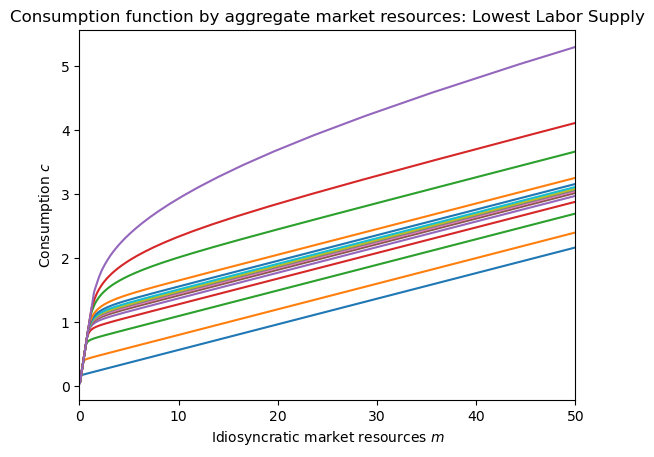

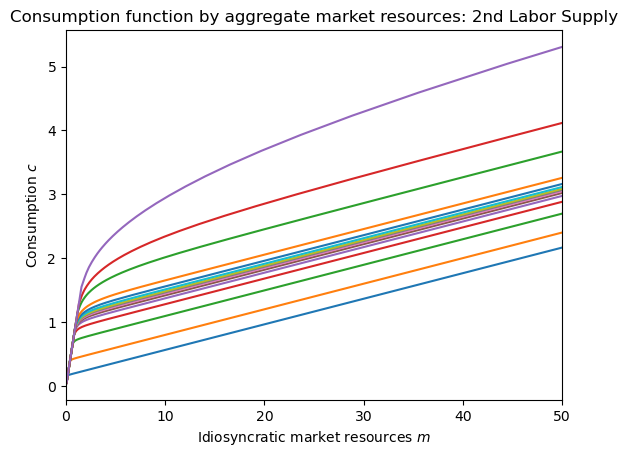

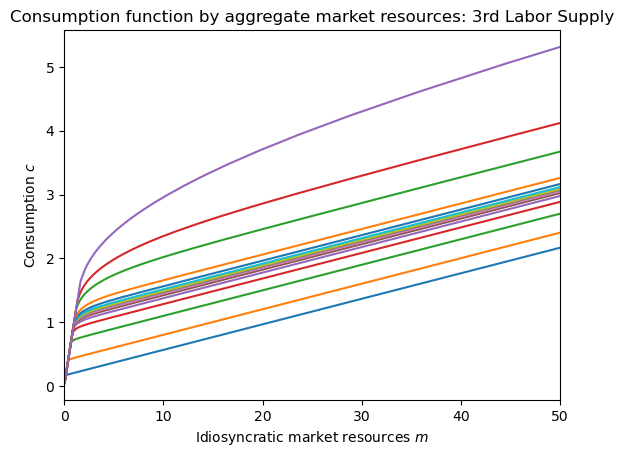

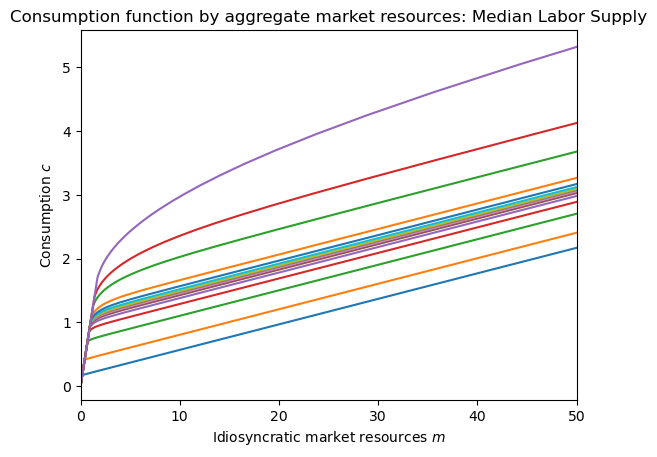

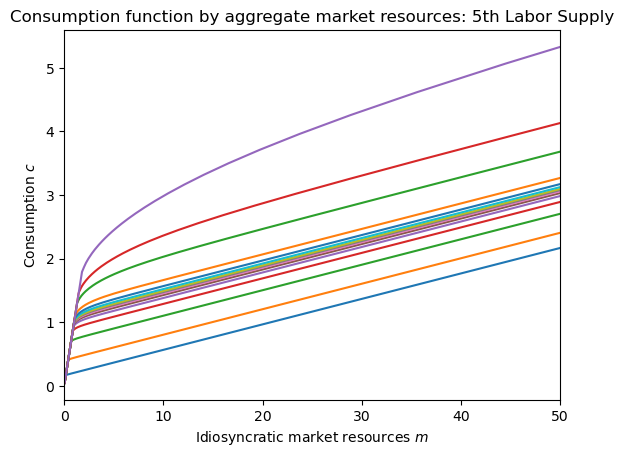

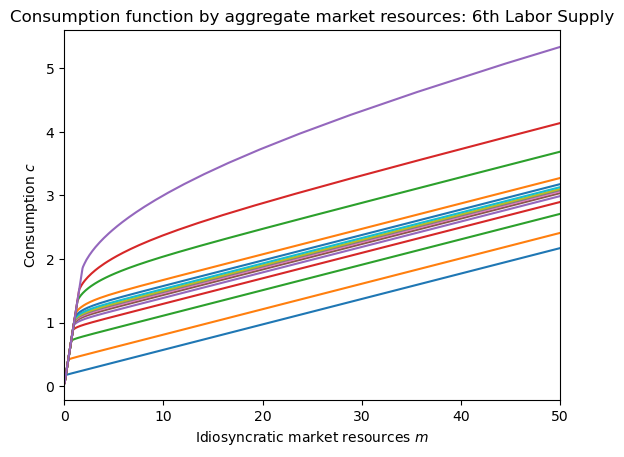

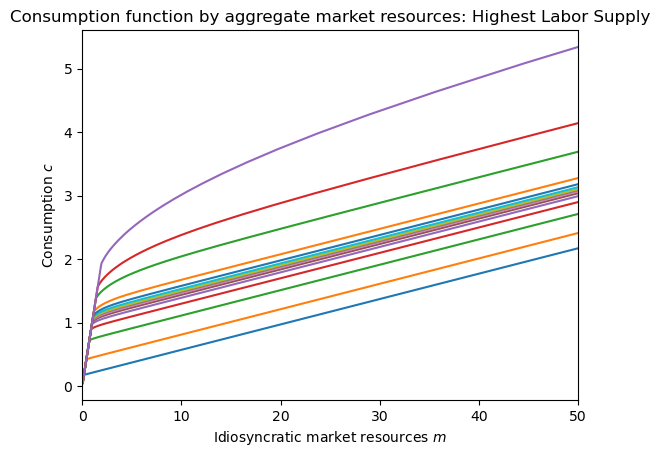

In [8]:
# Plot the consumption function for each Labor Supply State, from lowest (1st) to highest (7th):
state_names = ['Lowest Labor Supply', '2nd Labor Supply',
               '3rd Labor Supply', 'Median Labor Supply',
               '5th Labor Supply', '6th Labor Supply',
               'Highest Labor Supply']

# NEED TO REWORK BELOW!!! NEED TO CHECK WHAT IS REPORTED WHERE IN SOLUTION[0]
for j in range(7):
    plt.xlabel(r'Idiosyncratic market resources $m$')
    plt.ylabel(r'Consumption $c$')
    plt.title('Consumption function by aggregate market resources: ' + state_names[j])
    plot_funcs(A94type.solution[0].cFunc[4*j].xInterpolators, 0., 50.)

Aggregate savings as a function of aggregate market resources:
Saving figure aggregate_savings in ./Figures


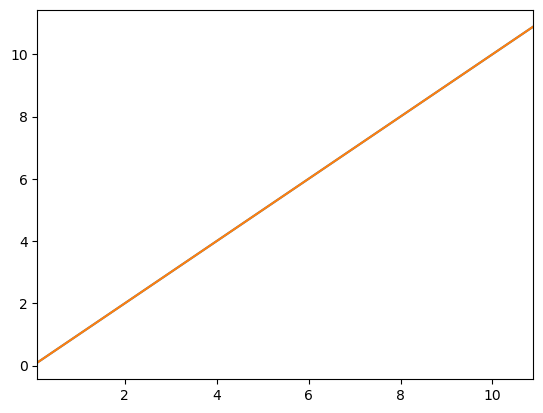

In [9]:
print('Aggregate savings as a function of aggregate market resources:')
bottom = 0.1
top = 2 * A94economy.KSS
x = np.linspace(bottom, top, 1000, endpoint=True)
y0 = A94economy.AFunc[0](x)
y1 = A94economy.AFunc[1](x)
plt.plot(x, y0)
plt.plot(x, y1)
plt.xlim([bottom, top])
make_figs('aggregate_savings', True, False, './Figures')
plt.show()
plt.clf()

## The Wealth Distribution of the Aiyagari model


In [12]:
sim_wealth = A94economy.reap_state['aNow'][0]
print('Maximal Wealth:')
print(max(sim_wealth))

print("The mean of individual wealth is "+ str(sim_wealth.mean()) + ";\n the standard deviation is "
      + str(sim_wealth.std())+";\n the median is " + str(np.median(sim_wealth)) +".")

Maximal Wealth:
22.04633324604029
The mean of individual wealth is 5.4389159200973145;
 the standard deviation is 3.69719975669068;
 the median is 4.718135905539691.


In [13]:
# Get some tools for plotting simulated vs actual wealth distributions
from HARK.utilities import get_lorenz_shares, get_percentiles

# The cstwMPC model conveniently has data on the wealth distribution
# from the U.S. Survey of Consumer Finances
from HARK.datasets import load_SCF_wealth_weights
SCF_wealth, SCF_weights = load_SCF_wealth_weights()

Saving figure wealth_distribution_1 in ./Figures


<Figure size 640x480 with 0 Axes>

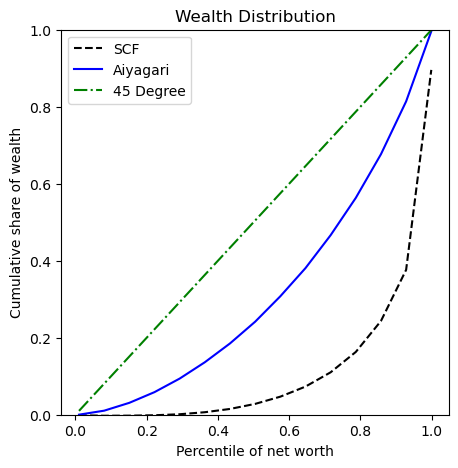

In [14]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.01,0.999,15)
SCF_Lorenz_points = get_lorenz_shares(SCF_wealth,weights=SCF_weights,percentiles=pctiles)
sim_Lorenz_points = get_lorenz_shares(sim_wealth,percentiles=pctiles)

# Plot
plt.figure(figsize=(5,5))
plt.title('Wealth Distribution')
plt.plot(pctiles,SCF_Lorenz_points,'--k',label='SCF')
plt.plot(pctiles,sim_Lorenz_points,'-b',label='Aiyagari')
plt.plot(pctiles,pctiles,'g-.',label='45 Degree')
plt.xlabel('Percentile of net worth')
plt.ylabel('Cumulative share of wealth')
plt.legend(loc=2)
plt.ylim([0,1])
make_figs('wealth_distribution_1', True, False, './Figures')
plt.show()

In [15]:
# Calculate a measure of the difference between the simulated and empirical distributions
lorenz_distance = np.sqrt(np.sum((SCF_Lorenz_points - sim_Lorenz_points)**2))
print("The Euclidean distance between simulated wealth distribution and the estimates from the SCF data is "+str(lorenz_distance) )

The Euclidean distance between simulated wealth distribution and the estimates from the SCF data is 0.9714388388514187


### Comments on the Aiyagari model:
* The results from the above replication of the Aiyagari (1994) model delivers an incredible savings rate of above 80% (this might be a bug), and a steady state rate of capital returns of roughly 3.6%, which is slightly lower than Aiyagari's 4.09%
* The Aiyagari model extends the Bewley model to a context with a production sector. It differs from the representative agent model in which complete market are implicitly assumed, it studies the aggregate saving behavior of the economy with the agents facing an uninsured idiosyncratic labor supply risk. With an empirically plausible set of parameters, it finds that the aggregate saving rate does increase compared to the case with a complete market. Furthermore, the results of the model qualitatively match the real data in terms of the ranking of the fluctuations of some economic variables. However, in terms of approaching the real inequalities of income and wealth shown by the data, the model does not perform very well (too little inequality). Also, in this model, the joint distribution of income and wealth is not treated as a state variable, which neglects the distribution effect Krusell and Smith(1998) address.

### Results from the original Aiyagari Paper:


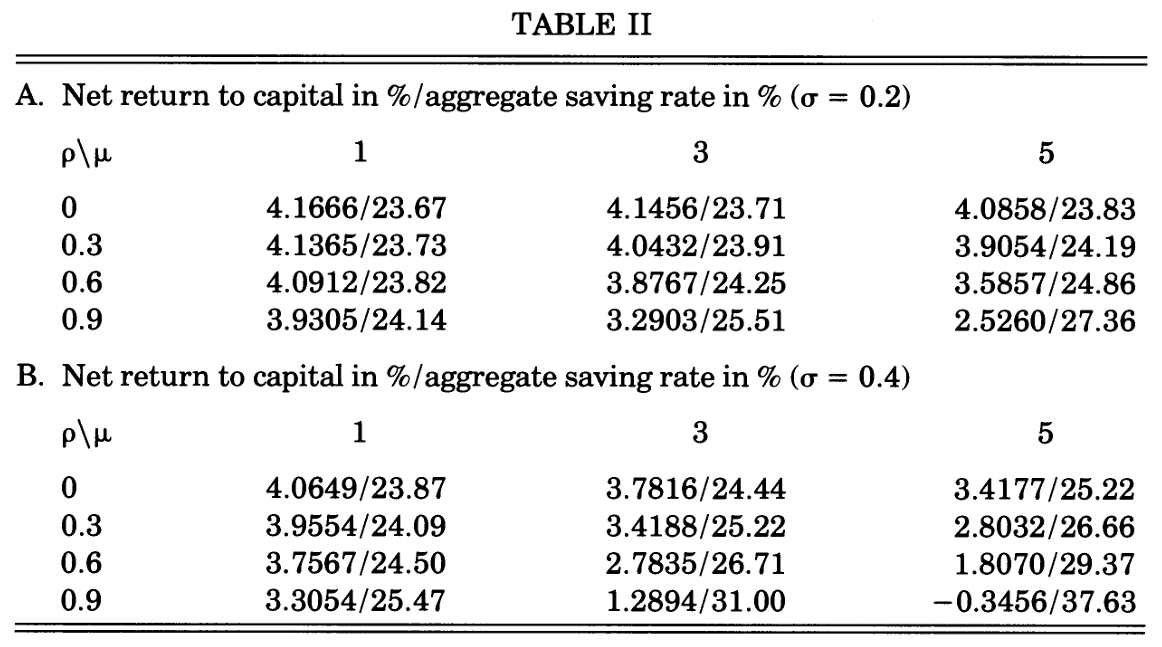



In [16]:
end_time = time.time()
total_time = end_time - start_time

import sys
    
with open('runtime.txt', 'w') as f:
    f.write(f'Total runtime: {total_time} seconds\n')
    f.write(f'Python version: {sys.version}')    
    
print("Total runtime: {:.2f} seconds".format(total_time))

Total runtime: 3543.33 seconds
